# Posterior Approximation for a Gaussian model

Posterior distribution of a Gaussian model:
$$P(\theta | y) \propto P(\theta_1, \theta_2 | y) p(\theta_1,\theta_2)= \frac{exp(\frac{\theta_1}{\theta_2}t_1(y) - \frac{t_2(y)}{2\theta_2}}{C(\theta_1, \theta_2)} p(\theta_1,\theta_2)$$
Where:
the $y$ is the observation

$t(y)=[t_1(y), t_2(y)]$ the vector of sufficient statistics: $t_1(y) = \sum_i^m y_i$ and $t_2(y) = \sum_i^m y_i^2$

$\theta = [\theta_1, \theta_2]$ the parameters: $\theta_1$ is **the mean** $\theta_2$ **the variance** ($var = \sigma^2$)

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from statsmodels.graphics.tsaplots import plot_acf

In [84]:
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)

    if not isinstance(data, list):
        data = data['posteriors']

    mean = [d[0] for d in data]
    var = [d[1] for d in data]
    data_frame = pd.DataFrame({'mean': mean, 'var': var})
    return data_frame

def sample(df, by):
    data_frame = pd.DataFrame({'mean': [mean[1] for mean in data2['mean'].items() if mean[0] % 10 == 0], 
                               'var': [var[1] for var in data2['var'].items() if var[0] % 10 == 0]})
    return data_frame

def plot_marginals(data_mh, data_abc, burn_in=0, by=1):
 
    fig, axs = plt.subplots(4, 2, figsize=(14,28))
    
    # ====== ABC ======
    
    # From theta parameter to p parameter
    mean_abc = data_abc['mean'].tolist()[burn_in::by]
    var_abc = data_abc['var'].tolist()[burn_in::by]
    
    # Distribution - mean
    sns.distplot(mean_abc, axlabel="mean distribution ABC", ax=axs[0,0])
    
    # Path - mean
    axs[1,0].plot(range(len(mean_abc)),mean_abc)
    axs[1,0].set(xlabel='iterations', ylabel='mean parameter ABC')
    
    # distribution - var
    sns.distplot(var_abc, axlabel="var distribution ABC", ax=axs[2,0])
    
    # Path - var
    axs[3,0].plot(range(len(var_abc)), var_abc)
    axs[3,0].set(xlabel='iterations', ylabel='var parameter ABC')
    
    # ====== MH ======
    
    mean_mh = data_mh['mean'].tolist()[burn_in::by]
    var_mh = data_mh['var'].tolist()[burn_in::by]
    
    # Distribution - mean
    sns.distplot(mean_mh, axlabel="mean distribution MH", ax=axs[0,1])

    # Path - mean
    axs[1,1].plot(range(len(mean_mh)),mean_mh)
    axs[1,1].set(xlabel='iterations', ylabel='mean parameter MH')
    
    # distribution - var
    sns.distplot(var_mh, axlabel="var distribution MH", ax=axs[2,1])
    
    # Path - var
    axs[3,1].plot(range(len(var_mh)), var_mh)
    axs[3,1].set(xlabel='iterations', ylabel='var parameter MH')

def plot_posterior(data, burn_in=None, by=None):

    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    mean = data['mean'].tolist()[burn_in::by]
    var = data['var'].tolist()[burn_in::by]

    fig = plt.figure(figsize=(12, 12))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
    main_ax = fig.add_subplot(grid[:-1, 1:])
    var_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
    mean_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

    # scatter points on the main axes
    main_ax.plot(mean, var, markersize=3)

    # histogram on the attached axes
    mean_hist.hist(mean, 40, histtype='stepfilled', orientation='vertical')
    mean_hist.invert_yaxis()
    mean_hist.set(xlabel="Mean parameter")
    var_hist.hist(var, 40, histtype='stepfilled',orientation='horizontal')
    var_hist.invert_xaxis()
    var_hist.set(ylabel="Var parameter")

    
def summary(data, burn_in=0, by=1):
    
    data_mean = data['mean'].tolist()[burn_in::by]
    data_var = data['var'].tolist()[burn_in::by]
    print("========== Q10 ==========")
    print("Q10 for theta_mean parameter {}".format(np.percentile(data_mean, 10)))
    print("Q10 for theta_var parameter {}".format(np.percentile(data_var, 10)))
    print("========== Q25 ==========")
    print("Q25 for theta_mean parameter {}".format(np.percentile(data_mean, 25)))
    print("Q25 for theta_var parameter {}".format(np.percentile(data_var, 25)))
    print("========== Median ==========")
    print("Median for theta_mean parameter {}".format(np.percentile(data_mean, 50)))
    print("Median for theta_var parameter {}".format(np.percentile(data_var, 50)))
    print("========== Mean ==========")
    print("Mean for theta_mean parameter {}".format(np.mean(data_mean)))
    print("Mean for theta_var parameter {}".format(np.mean(data_var)))
    print("========== Q75 ==========")
    print("Q25 for theta_mean parameter {}".format(np.percentile(data_mean, 75)))
    print("Q25 for theta_var parameter {}".format(np.percentile(data_var, 75)))
    print("========== Q95 ==========")
    print("Q25 for theta_mean parameter {}".format(np.percentile(data_mean, 95)))
    print("Q25 for theta_var parameter {}".format(np.percentile(data_var, 95)))

def comparaison(data_mh, data_abc, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    fig, axs = plt.subplots(2, 2, figsize=(14,14))

    mean_abc = data_abc["mean"].tolist()[burn_in::by]
    mean_mh = data_mh["mean"].tolist()[burn_in::by]

    df_mean = pd.DataFrame({"mean MH": mean_mh, "mean ABC" : mean_abc})
    
    print(type(axs[0,0]))
    axs[0,0].set_title(label="Normal distribution - mean parameter")
    sns.boxplot(data=df_mean, ax=axs[0,0])
    
    axs[0,1].scatter(sorted(mean_mh), sorted(mean_abc))
    axs[0,1].set_title(label="Normal distribution - mean parameter : QQ plot")

    var_abc = data_abc["var"].tolist()[burn_in::by]
    var_mh = data_mh["var"].tolist()[burn_in::by]

    df_var = pd.DataFrame({"var MH": var_mh, "var ABC" : var_abc})
    sns.boxplot(data=df_var, ax=axs[1,0])
    axs[1,0].set_title(label="Normal distribution - variance parameter")
    
    var_abc.sort()
    var_mh.sort()
    
    axs[1,1].scatter(var_mh, var_abc)
    axs[1,1].set_title(label="Normal distribution - variance parameter : QQ plot")
    plt.savefig('dist_norm_mh_abc.pdf')
   # plt.show()

def autocor(data_mh, data_abc, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    fig, axs = plt.subplots(4, 1, sharex='col', sharey='row', figsize=(14,21)) 
    
    mean_abc = data_abc["mean"].tolist()[burn_in::by]
    mean_mh = data_mh['mean'].tolist()[burn_in::by]
    var_abc = data_abc["var"].tolist()[burn_in::by]
    var_mh = data_mh['var'].tolist()[burn_in::by]
    
    plot_acf(mean_mh, ax=axs[0])
    axs[0].set_title("Autocorrelation for mean parameter (MH)")
    
    plot_acf(var_mh, ax=axs[1])
    axs[1].set_title("Autocorrelation for var parameter (MH)")
    
    plot_acf(mean_abc, ax=axs[2])
    axs[2].set_title("Autocorrelation for mean parameter (ABC)")
    
    plot_acf(var_mh, ax=axs[3])
    axs[3].set_title("Autocorrelation for var parameter (ABC)")

# Results #1

### MH settings

* sample size : $size=100$
* $theta_0 = [10,17]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.025]$
* Number of samples: $n=100000$
* $n_{algo} = 100$

### ABC settings
* sample size : $size=d100$
* $theta_0 = [10,17]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.025]$
* Number of samples: $n=100000$
* Shadow chain length: $n_{shadow} = 100$

In [42]:
FILE_NAME_0 = 'assets/mh_samples/norm_mh_100000.json'

In [43]:
data0 = extract_from_file(FILE_NAME_0)

In [82]:
summary(data0,burn_in=100, by=20)

========== Q10 ==========
Q1 for theta_mean parameter 1.3091643189209794
Q1 for theta_var parameter 6.622886455448818
========== Q25 ==========
Q1 for theta_mean parameter 1.4828092043109575
Q1 for theta_var parameter 7.193676005805024
========== Median ==========
Median for theta_mean parameter 1.6711176349567474
Median for theta_var parameter 7.932640980264118
========== Mean ==========
Mean for theta_mean parameter 1.6744862486038978
Mean for theta_var parameter 8.104783025275728
========== Q75 ==========
Q3 for theta_mean parameter 1.866699060581726
Q3 for theta_var parameter 8.80042271220821
========== Q95 ==========
Q3 for theta_mean parameter 2.1444905704173993
Q3 for theta_var parameter 10.417064255984961


In [45]:
FILE_NAME_1 = 'assets/abc_samples/norm_abc_100000.json'

In [46]:
data1 = extract_from_file(FILE_NAME_1)

In [83]:
summary(data1, burn_in=100, by=20)

========== Q10 ==========
Q1 for theta_mean parameter 1.2851008381159068
Q1 for theta_var parameter 6.627006103419058
========== Q25 ==========
Q1 for theta_mean parameter 1.473651459790692
Q1 for theta_var parameter 7.180128827122566
========== Median ==========
Median for theta_mean parameter 1.681303373675791
Median for theta_var parameter 7.899881099719754
========== Mean ==========
Mean for theta_mean parameter 1.6806318145767771
Mean for theta_var parameter 7.996908020272441
========== Q75 ==========
Q3 for theta_mean parameter 1.8860679442073762
Q3 for theta_var parameter 8.681680147209924
========== Q95 ==========
Q3 for theta_mean parameter 2.1758980349892685
Q3 for theta_var parameter 9.99592328952043


## Posterior distribution for MH sampler

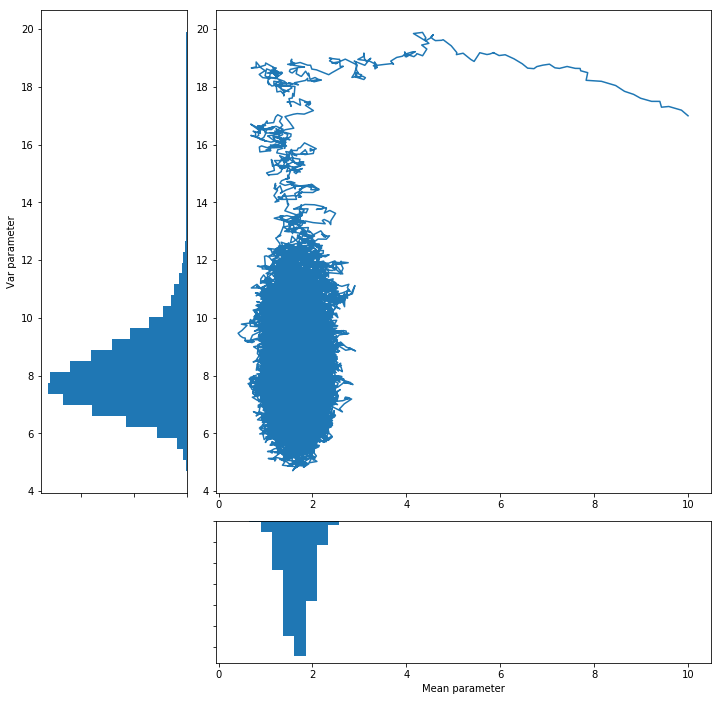

In [48]:
plot_posterior(data0)
#plt.savefig('post_norm_mh.png', dpi=300, transparent=True)

## Posterior distribution for ABC sampler

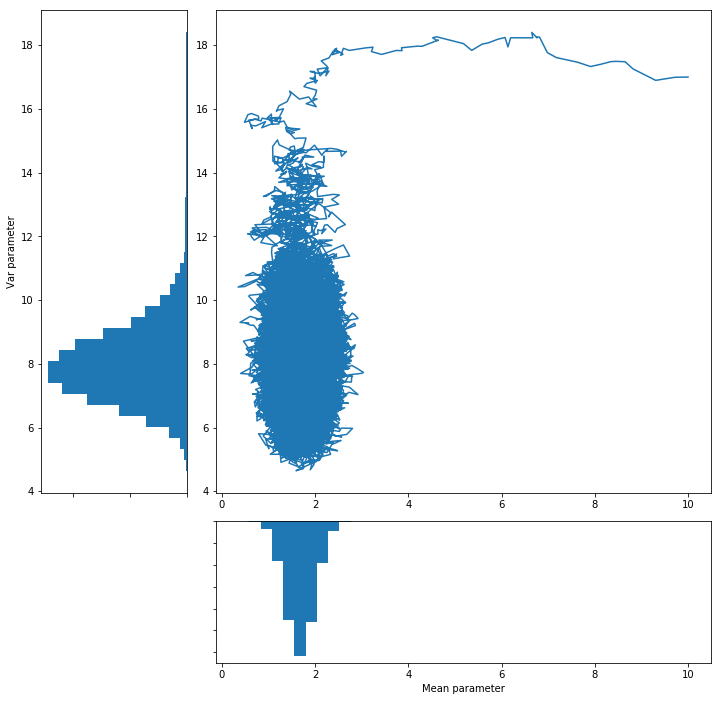

In [49]:
plot_posterior(data1)
#plt.savefig('post_norm_abc.png', dpi=300, transparent=True)

### Marginal distribution plot

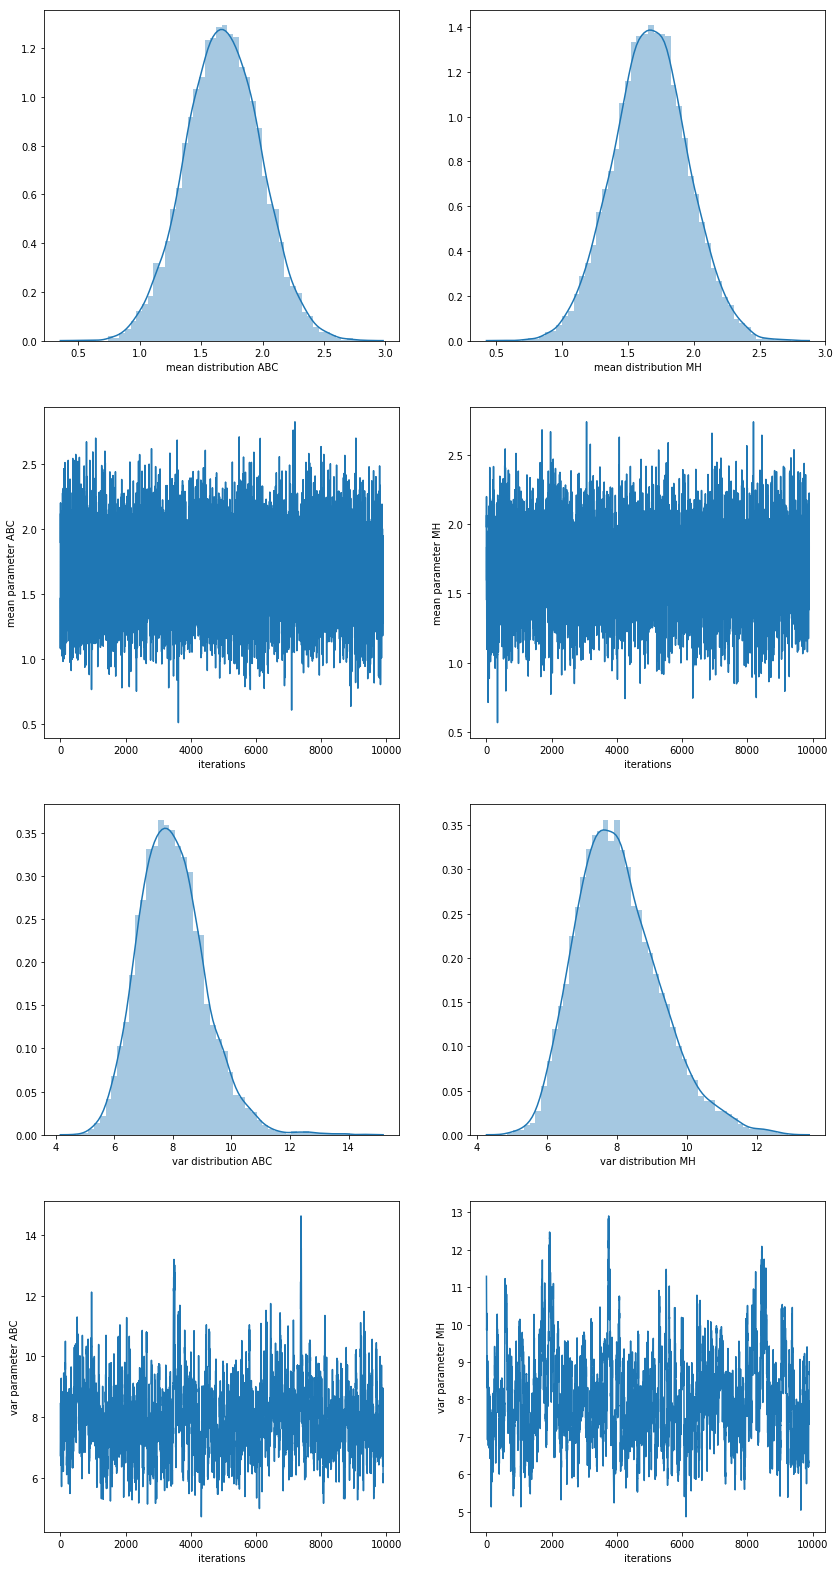

In [50]:
plot_marginals(data0, data1, burn_in=1000, by=10)

## comparaison between MH and ABC

<class 'matplotlib.axes._subplots.AxesSubplot'>


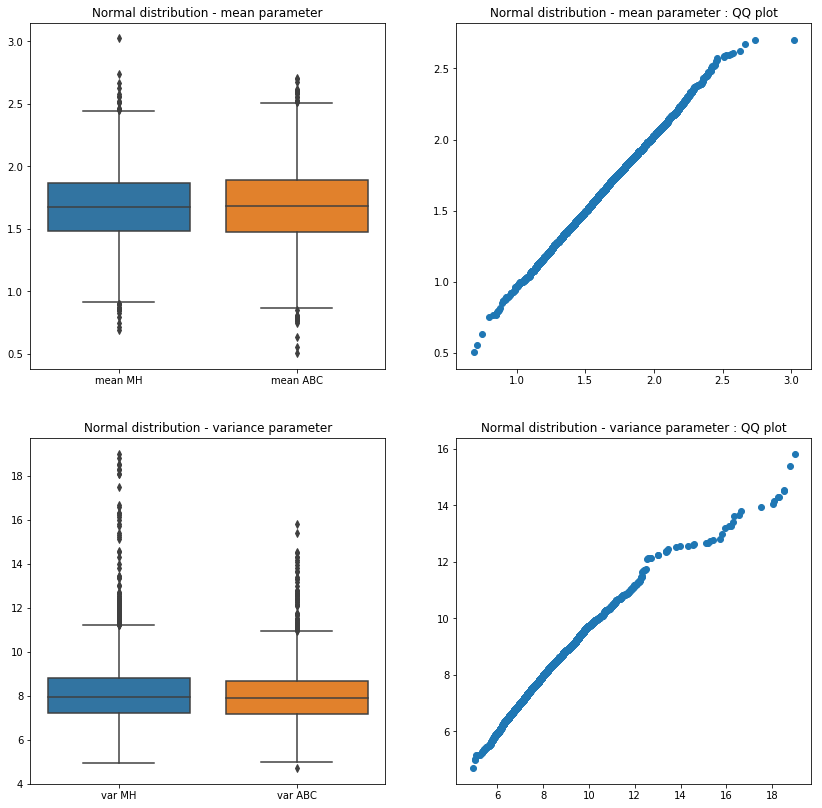

In [68]:
comparaison(data0, data1, burn_in=100, by=20)
plt.savefig('dist_norm_mh_abc_test.png', dpi=300, transparent=True)

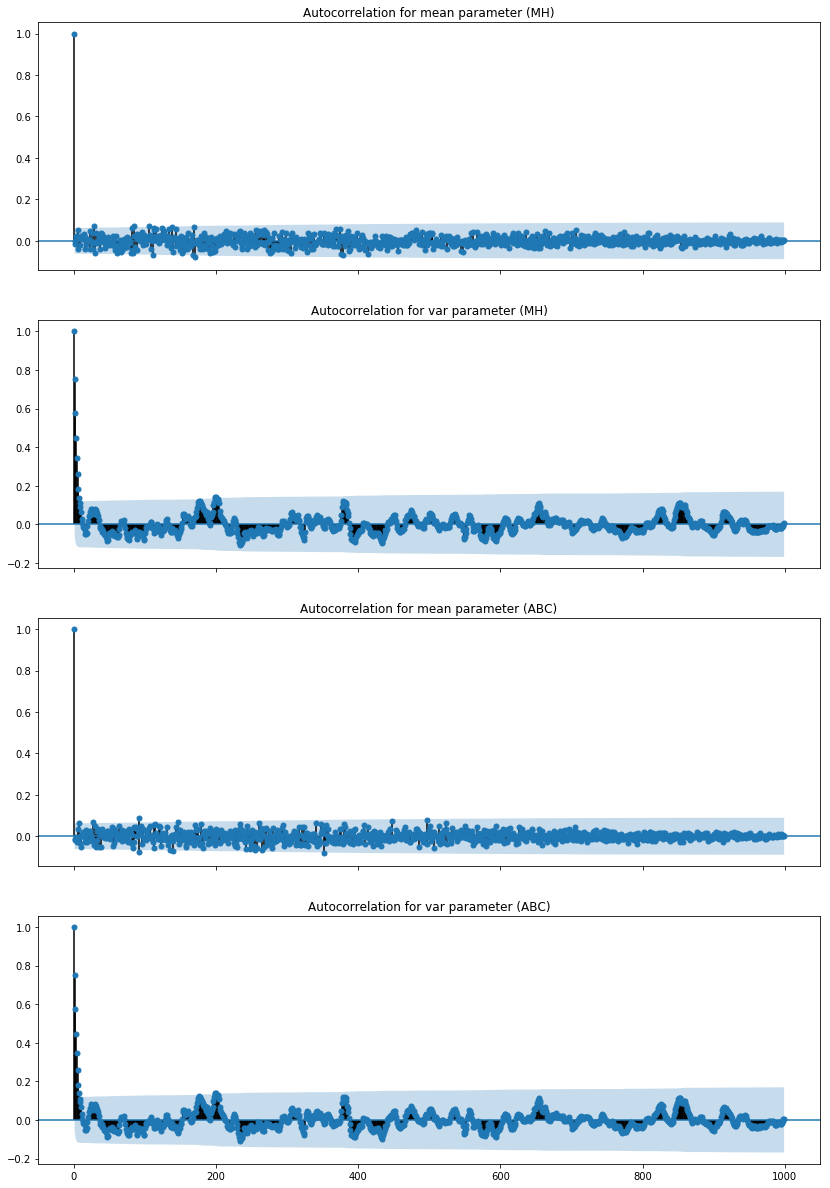

In [52]:
autocor(data0, data1, burn_in=100, by=100)

# Second results

### MH settings

* sample size : $size=1000$
* $theta_0 = [10,17]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.025]$
* Number of samples: $n=200000$
* $n_{algo} = 100$

### ABC settings
* sample size : $size=1000$
* $theta_0 = [10,17]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.025]$
* Number of samples: $n=200000$
* Shadow chain length: $n_{shadow} = 100$

In [33]:
FILE_NAME_2 = 'assets/abc_samples/abc_shadow-normal-1545148531.2907991.json'
data2 = extract_from_file(FILE_NAME_2)

In [34]:
summary(data2)

========== Q1 ==========
Q1 for theta_mean parameter 1.9062997839478224
Q1 for theta_var parameter 8.783757551545714
========== Median ==========
Median for theta_mean parameter 1.984123727281117
Median for theta_var parameter 9.063200696709263
========== Mean ==========
Mean for theta_mean parameter 1.9845301834888733
Mean for theta_var parameter 9.08237318186546
========== Q3 ==========
Q3 for theta_mean parameter 2.061935396461337
Q3 for theta_var parameter 9.355788104806575


In [35]:
FILE_NAME_3 = 'assets/mh_samples/metropolis_hasting-normal-1545169909.2930682.json'
data3 = extract_from_file(FILE_NAME_3)

In [36]:
summary(data3)

========== Q1 ==========
Q1 for theta_mean parameter 2.022040792991741
Q1 for theta_var parameter 8.609974692207876
========== Median ==========
Median for theta_mean parameter 2.085552202305154
Median for theta_var parameter 8.871204848606327
========== Mean ==========
Mean for theta_mean parameter 2.086156697008073
Mean for theta_var parameter 8.891959342411388
========== Q3 ==========
Q3 for theta_mean parameter 2.148884254505027
Q3 for theta_var parameter 9.149542811527366


<class 'matplotlib.axes._subplots.AxesSubplot'>


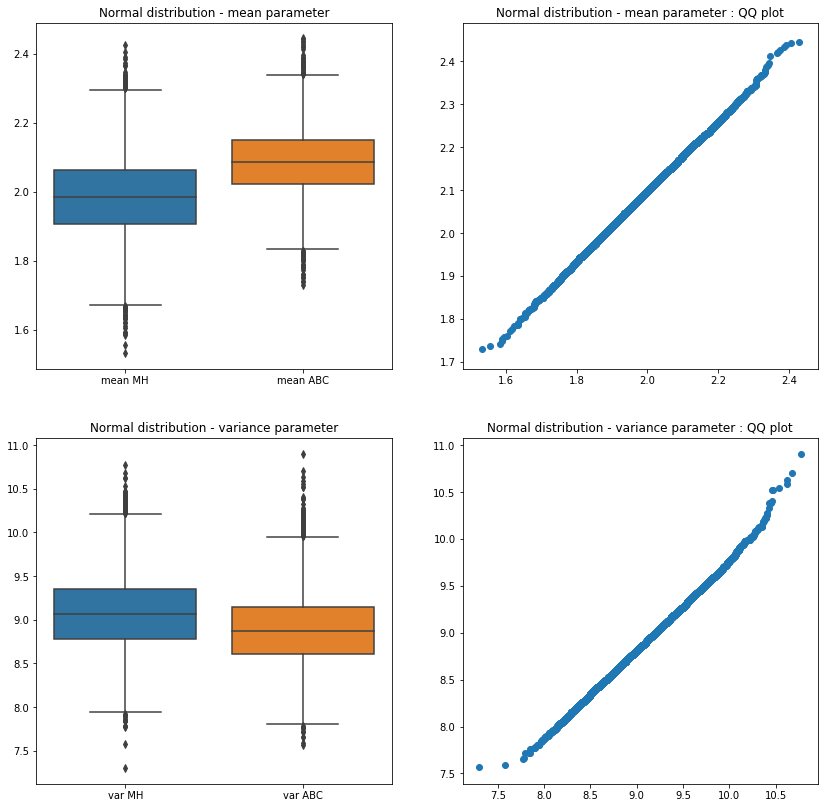

<Figure size 432x288 with 0 Axes>

In [39]:
comparaison(data2, data3, burn_in=500, by=20)
plt.savefig('dist_norm_mh_abc.pdf', transparent=True)